In [138]:
# Import magics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path
import re
import requests
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

output = Path('ISDS/Exam/output')

## Importing data from UFM

In [139]:
# Since the UFM data source https://datavarehus.ufm.dk/rapporter/ledighed does not provide any API we download the data
# and store it in our github repo:
df_ufm_1 = pd.read_csv("ledighed_drivkraft.csv", sep=';', decimal=',', header=[1], skipinitialspace=True)
df_ufm_1

,Uddannelse,MGRPTX,Ledighedsgrad,Ledighedsgrad.1,Ledighedsgrad.2,Ledighedsgrad.3,Ledighedsgrad.4,Ledighedsgrad.5,Ledighedsgrad.6,Ledighedsgrad.7,Ledighedsgrad.8,Ledighedsgrad.9,Ledighedsgrad.10,Ledighedsgrad.11
0,Erhvervsakademiuddannelser (EA),Total,"8,2 %","11,5 %","10,9 %","10,0 %","10,8 %","10,6 %","10,3 %","10,0 %","9,9 %","9,1 %","9,4 %","11,3 %"
1,Øvrige korte videregående uddannelser,Total,"1,7 %","2,8 %","1,7 %","3,8 %","4,1 %","4,1 %","4,0 %","9,2 %","9,9 %","6,3 %","3,1 %","4,8 %"
2,Professionsbachelorer,Total,"3,6 %","6,4 %","8,9 %","9,4 %","10,3 %","8,8 %","8,1 %","8,1 %","7,5 %","7,2 %","7,7 %","9,4 %"
3,Øvrige mellemlange videregående uddannelser,Total,"2,7 %","4,4 %","9,0 %","10,5 %","8,5 %","5,8 %","6,5 %","3,6 %","7,4 %","5,9 %","4,3 %","4,2 %"
4,Udelte kandidatuddannelser,Total,"4,7 %","8,5 %","6,9 %","4,2 %","10,1 %","8,8 %","14,9 %","31,4 %","26,3 %",NaN,NaN,NaN
5,Kandidatuddannelser,Total,"8,9 %","12,7 %","13,4 %","13,5 %","13,5 %","12,7 %","11,3 %","10,8 %","11,1 %","11,3 %","11,9 %","13,5 %"
6,Kandidatuddannelser,"Samfund, kandidat","5,5 %","8,8 %","10,4 %","11,8 %","11,7 %","10,0 %","9,0 %","8,4 %","8,3 %","7,9 %","8,9 %","9,5 %"
7,Kandidatuddannelser,"Humaniora, kandidat","15,6 %","21,0 %","21,3 %","21,9 %","22,6 %","21,5 %","19,4 %","18,9 %","19,1 %","20,3 %","21,4 %","25,3 %"
8,Kandidatuddannelser,"Teknik, kandidat","9,4 %","12,3 %","10,1 %","9,0 %","10,1 %","10,8 %","9,5 %","8,2 %","9,1 %","8,4 %","9,2 %","10,9 %"
9,Kandidatuddannelser,"Natur, kandidat","8,5 %","11,5 %","13,8 %","13,6 %","13,1 %","13,0 %","11,7 %","11,5 %","12,4 %","12,9 %","13,5 %","14,7 %"


In [140]:
df_ufm_2 = pd.read_csv("ledighed.csv", skipinitialspace = True, sep=',', decimal='.')
df_ufm_2

,Uddannelse,MGRPTX,UGRPTX,Fuldførelsesår,Ledighedsgrad,Fuldførte
0,Erhvervsakademiuddannelser (EA),"Bio- og laboratorietekniske område, EA","Bio- og laboratorietekniske område, EA",2017,"9,6 %",591
1,Erhvervsakademiuddannelser (EA),"Bio- og laboratorietekniske område, EA","Bio- og laboratorietekniske område, EA",2018,"10,1 %",581
2,Erhvervsakademiuddannelser (EA),"Bio- og laboratorietekniske område, EA","Bio- og laboratorietekniske område, EA",2019,"8,9 %",607
3,Erhvervsakademiuddannelser (EA),"Designfaglige område, EA","Designfaglige område, EA",2017,"10,9 %",716
4,Erhvervsakademiuddannelser (EA),"Designfaglige område, EA","Designfaglige område, EA",2018,"11,7 %",692
...,...,...,...,...,...,...
188,Kandidatuddannelser,"Sundhed, kandidat","Sundhed (prof.rettet), kandidat",2018,"4,8 %",171
189,Kandidatuddannelser,"Sundhed, kandidat","Sundhed (prof.rettet), kandidat",2019,"5,0 %",176
190,Kandidatuddannelser,"Sundhed, kandidat","Øvrige sundhed, kandidat",2017,"10,0 %",764
191,Kandidatuddannelser,"Sundhed, kandidat","Øvrige sundhed, kandidat",2018,"11,0 %",750


In [141]:
# We make a sub dataframe for the educations within the fields of social sciences (samf):
df_ss = df_ufm_2.iloc[118:132, :].copy()
df_ss.reset_index(drop=True)

,Uddannelse,MGRPTX,UGRPTX,Fuldførelsesår,Ledighedsgrad,Fuldførte
0,Kandidatuddannelser,"Samfund, kandidat","Jura, kandidat",2017,"4,3 %",1470
1,Kandidatuddannelser,"Samfund, kandidat","Jura, kandidat",2018,"3,6 %",1187
2,Kandidatuddannelser,"Samfund, kandidat","Jura, kandidat",2019,"3,2 %",1275
3,Kandidatuddannelser,"Samfund, kandidat","Erhvervsøkonomi, kandidat",2017,"6,7 %",4967
4,Kandidatuddannelser,"Samfund, kandidat","Erhvervsøkonomi, kandidat",2018,"7,3 %",4695
5,Kandidatuddannelser,"Samfund, kandidat","Erhvervsøkonomi, kandidat",2019,"8,1 %",4641
6,Kandidatuddannelser,"Samfund, kandidat","Forvaltning mv., kandidat",2017,"9,2 %",1760
7,Kandidatuddannelser,"Samfund, kandidat","Forvaltning mv., kandidat",2018,"11,7 %",1714
8,Kandidatuddannelser,"Samfund, kandidat","Forvaltning mv., kandidat",2019,"9,9 %",1679
9,Kandidatuddannelser,"Samfund, kandidat","Psykologi, kandidat",2017,"8,8 %",789


In [142]:
# Replace "," notation with "." notation and replace "%" signs with an empty string:
df_ss['Ledighedsgrad'] = [x.replace(',', '.') for x in df_ss['Ledighedsgrad']].copy()
df_ss['Ledighedsgrad'] = [x.replace('%', '') for x in df_ss['Ledighedsgrad']].copy()

# Convert colum 'Ledighedsgrad' into float type:
df_ss['Ledighedsgrad'] = df_ss['Ledighedsgrad'].astype(float)

In [143]:
ledighed_jura = df_ss.iloc[0:3, 4].sum() / 3
gen_ledighed_jura = "{:.2f}".format(ledighed_jura)
print(f'Den gennemsnitlige ledighed for jura er {gen_ledighed_jura} pct.')

ledighed_ervøko = df_ss.iloc[3:6, 4].sum() / 3
gen_ledighed_ervøko = "{:.2f}".format(ledighed_ervøko)
print(f'Den gennemsnitlige ledighed for erhvervsøkonomi er {gen_ledighed_ervøko} pct.')

ledighed_forval = df_ss.iloc[6:9, 4].sum() / 3
gen_ledighed_forval = "{:.2f}".format(ledighed_forval)
print(f'Den gennemsnitlige ledighed for forvaltning er {gen_ledighed_forval} pct.')

ledighed_psyko = df_ss.iloc[9:12, 4].sum() / 3
gen_ledighed_psyko = "{:.2f}".format(ledighed_psyko)
print(f'Den gennemsnitlige ledighed for psykologi er {gen_ledighed_psyko} pct.')

ledighed_øvrig = df_ss.iloc[12:15, 4].sum() / 3
gen_ledighed_øvrig = "{:.2f}".format(ledighed_øvrig)
print(f'Den gennemsnitlige ledighed for øvrige samfundsvidenskabelige uddannelser er {gen_ledighed_øvrig} pct.')

Den gennemsnitlige ledighed for jura er 3.70 pct.
Den gennemsnitlige ledighed for erhvervsøkonomi er 7.37 pct.
Den gennemsnitlige ledighed for forvaltning er 10.27 pct.
Den gennemsnitlige ledighed for psykologi er 11.87 pct.
Den gennemsnitlige ledighed for øvrige samfundsvidenskabelige uddannelser er 10.57 pct.


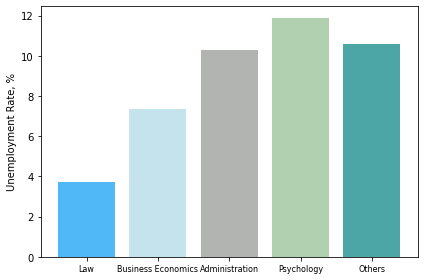

In [144]:
colors = ['#069AF3','lightblue','#929591','darkseagreen','teal']
objects = ('Law', 'Business Economics', 'Administration', 'Psychology', 'Others')
y_pos = np.arange(len(objects))
values = [ledighed_jura, ledighed_ervøko, ledighed_forval, ledighed_psyko, ledighed_øvrig]
plt.rcParams['axes.facecolor'] = 'white' # change background color
plt.bar(y_pos, values, align='center', alpha=0.7, color=colors)
plt.xticks(y_pos, objects, rotation=0, fontsize=8)
plt.ylabel('Unemployment Rate, %', fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('Unemployment_ss2.png', facecolor="white", bbox_inches='tight',transparent=True, pad_inches=0)
plt.tight_layout()

In [145]:
df_ufm_1.drop(df_ufm_1.tail(3).index,inplace=True) # drop last three rows

In [149]:
df_ufm_1 = df_ufm_1.replace(' %', '', regex=True)
df_ufm_1 = df_ufm_1.replace(',', '.', regex=True)

df_ufm_1

,Uddannelse,MGRPTX,Ledighedsgrad,Ledighedsgrad.1,Ledighedsgrad.2,Ledighedsgrad.3,Ledighedsgrad.4,Ledighedsgrad.5,Ledighedsgrad.6,Ledighedsgrad.7,Ledighedsgrad.8,Ledighedsgrad.9,Ledighedsgrad.10,Ledighedsgrad.11
0,Erhvervsakademiuddannelser (EA),Total,8.2,11.5,10.9,10.0,10.8,10.6,10.3,10.0,9.9,9.1,9.4,11.3
1,Øvrige korte videregående uddannelser,Total,1.7,2.8,1.7,3.8,4.1,4.1,4.0,9.2,9.9,6.3,3.1,4.8
2,Professionsbachelorer,Total,3.6,6.4,8.9,9.4,10.3,8.8,8.1,8.1,7.5,7.2,7.7,9.4
3,Øvrige mellemlange videregående uddannelser,Total,2.7,4.4,9.0,10.5,8.5,5.8,6.5,3.6,7.4,5.9,4.3,4.2
4,Udelte kandidatuddannelser,Total,4.7,8.5,6.9,4.2,10.1,8.8,14.9,31.4,26.3,NaN,NaN,NaN
5,Kandidatuddannelser,Total,8.9,12.7,13.4,13.5,13.5,12.7,11.3,10.8,11.1,11.3,11.9,13.5
6,Kandidatuddannelser,Samfund. kandidat,5.5,8.8,10.4,11.8,11.7,10.0,9.0,8.4,8.3,7.9,8.9,9.5
7,Kandidatuddannelser,Humaniora. kandidat,15.6,21.0,21.3,21.9,22.6,21.5,19.4,18.9,19.1,20.3,21.4,25.3
8,Kandidatuddannelser,Teknik. kandidat,9.4,12.3,10.1,9.0,10.1,10.8,9.5,8.2,9.1,8.4,9.2,10.9
9,Kandidatuddannelser,Natur. kandidat,8.5,11.5,13.8,13.6,13.1,13.0,11.7,11.5,12.4,12.9,13.5,14.7


In [160]:
df_ufm_1['Ledighedsgrad'] = [x.replace(',', '.') for x in df_ufm_1['Ledighedsgrad']].copy()
df_ufm_1['Ledighedsgrad'] = [x.replace('%', '') for x in df_ufm_1['Ledighedsgrad']].copy()

df_ufm_1['Ledighedsgrad.1'] = [x.replace(',', '.') for x in df_ufm_1['Ledighedsgrad.1']].copy()
df_ufm_1['Ledighedsgrad.1'] = [x.replace('%', '') for x in df_ufm_1['Ledighedsgrad.1']].copy()

df_ufm_1['Ledighedsgrad.2'] = [x.replace(',', '.') for x in df_ufm_1['Ledighedsgrad.2']].copy()
df_ufm_1['Ledighedsgrad.2'] = [x.replace('%', '') for x in df_ufm_1['Ledighedsgrad.2']].copy()

df_ufm_1['Ledighedsgrad'] = df_ufm_1['Ledighedsgrad']

df_ufm_1['Ledighedsgrad.1'] = df_ufm_1['Ledighedsgrad.1']

df_ufm_1['Ledighedsgrad.2'] = df_ufm_1['Ledighedsgrad.2']

In [161]:
df_ufm_1

,Uddannelse,MGRPTX,Ledighedsgrad,Ledighedsgrad.1,Ledighedsgrad.2,Ledighedsgrad.3,Ledighedsgrad.4,Ledighedsgrad.5,Ledighedsgrad.6,Ledighedsgrad.7,Ledighedsgrad.8,Ledighedsgrad.9,Ledighedsgrad.10,Ledighedsgrad.11
0,Erhvervsakademiuddannelser (EA),Total,8.2,11.5,10.9,10.0,10.8,10.6,10.3,10.0,9.9,9.1,9.4,11.3
1,Øvrige korte videregående uddannelser,Total,1.7,2.8,1.7,3.8,4.1,4.1,4.0,9.2,9.9,6.3,3.1,4.8
2,Professionsbachelorer,Total,3.6,6.4,8.9,9.4,10.3,8.8,8.1,8.1,7.5,7.2,7.7,9.4
3,Øvrige mellemlange videregående uddannelser,Total,2.7,4.4,9.0,10.5,8.5,5.8,6.5,3.6,7.4,5.9,4.3,4.2
4,Udelte kandidatuddannelser,Total,4.7,8.5,6.9,4.2,10.1,8.8,14.9,31.4,26.3,NaN,NaN,NaN
5,Kandidatuddannelser,Total,8.9,12.7,13.4,13.5,13.5,12.7,11.3,10.8,11.1,11.3,11.9,13.5
6,Kandidatuddannelser,Samfund. kandidat,5.5,8.8,10.4,11.8,11.7,10.0,9.0,8.4,8.3,7.9,8.9,9.5
7,Kandidatuddannelser,Humaniora. kandidat,15.6,21.0,21.3,21.9,22.6,21.5,19.4,18.9,19.1,20.3,21.4,25.3
8,Kandidatuddannelser,Teknik. kandidat,9.4,12.3,10.1,9.0,10.1,10.8,9.5,8.2,9.1,8.4,9.2,10.9
9,Kandidatuddannelser,Natur. kandidat,8.5,11.5,13.8,13.6,13.1,13.0,11.7,11.5,12.4,12.9,13.5,14.7


In [165]:
antal_ledige_samf_2017 = round((float(df_ufm_1.iloc[3, 2]) / 100) * (float(df_ufm_1.iloc[3, 3]) * 1000))

antal_ledige_samf_2018 = round((float(df_ufm_1.iloc[3, 4]) / 100) * (float(df_ufm_1.iloc[3, 5]) * 1000))

antal_ledige_samf_2019 = round((float(df_ufm_1.iloc[3, 6]) / 100) * (float(df_ufm_1.iloc[3, 7]) * 1000))

antal_ledige_samf_samlet = antal_ledige_samf_2017 + antal_ledige_samf_2018 + antal_ledige_samf_2019

In [168]:
antal_ledige_human_2017 = round((float(df_ufm_1.iloc[4, 2]) / 100) * (float(df_ufm_1.iloc[4, 3]) * 1000))

antal_ledige_human_2018 = round((float(df_ufm_1.iloc[4, 4]) / 100) * (float(df_ufm_1.iloc[4, 5]) * 1000))

antal_ledige_human_2019 = round((float(df_ufm_1.iloc[4, 6]) / 100) * (float(df_ufm_1.iloc[4, 7]) * 1000))

antal_ledige_human_samlet = antal_ledige_human_2017 + antal_ledige_human_2018 + antal_ledige_human_2019

In [169]:
antal_ledige_teknik_2017 = round((float(df_ufm_1.iloc[5, 2]) / 100) * (float(df_ufm_1.iloc[5, 3]) * 1000))

antal_ledige_teknik_2018 = round((float(df_ufm_1.iloc[5, 4]) / 100) * (float(df_ufm_1.iloc[5, 5]) * 1000))

antal_ledige_teknik_2019 = round((float(df_ufm_1.iloc[5, 6]) / 100) * (float(df_ufm_1.iloc[5, 7]) * 1000))

antal_ledige_teknik_samlet = antal_ledige_teknik_2017 + antal_ledige_teknik_2018 + antal_ledige_teknik_2019

In [170]:
antal_ledige_natur_2017 = round((float(df_ufm_1.iloc[6, 2]) / 100) * (float(df_ufm_1.iloc[6, 3]) * 1000))

antal_ledige_natur_2018 = round((float(df_ufm_1.iloc[6, 4]) / 100) * (float(df_ufm_1.iloc[6, 5]) * 1000))

antal_ledige_natur_2019 = round((float(df_ufm_1.iloc[6, 6]) / 100) * (float(df_ufm_1.iloc[6, 7]) * 1000))

antal_ledige_natur_samlet = antal_ledige_natur_2017 + antal_ledige_natur_2018 + antal_ledige_natur_2019
print(antal_ledige_natur_samlet)

2881


In [171]:
antal_ledige_sundh_2017 = round((float(df_ufm_1.iloc[7, 2]) / 100) * (float(df_ufm_1.iloc[7, 3]) * 1000))

antal_ledige_sundh_2018 = round((float(df_ufm_1.iloc[7, 4]) / 100) * (float(df_ufm_1.iloc[7, 5]) * 1000))

antal_ledige_sundh_2019 = round((float(df_ufm_1.iloc[7, 6]) / 100) * (float(df_ufm_1.iloc[7, 7]) * 1000))

antal_ledige_sundh_samlet = antal_ledige_sundh_2017 + antal_ledige_sundh_2018 + antal_ledige_sundh_2019
print(antal_ledige_sundh_samlet)

12800


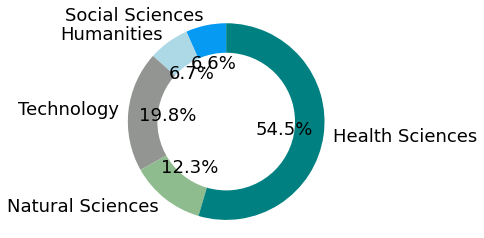

In [172]:
# Pie chart
labels = ["Social Sciences", "Humanities", "Technology", "Natural Sciences", "Health Sciences"]

#colors
colors = ['#069AF3','lightblue','#929591','darkseagreen','teal']
y = np.array([antal_ledige_samf_samlet, antal_ledige_human_samlet, antal_ledige_teknik_samlet, antal_ledige_natur_samlet, antal_ledige_sundh_samlet])

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(y, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 18})
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
plt.rcParams["figure.figsize"] = (16,10)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.savefig('Unemployment_driving_force.png', facecolor="white", bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()
